<a href="https://colab.research.google.com/github/Ujanghost/metropolis_algo/blob/main/Metropolis_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

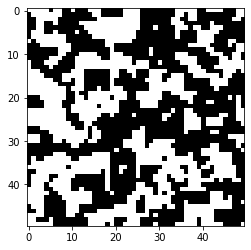

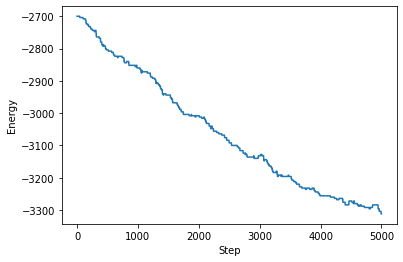

(array([[-1, -1, -1, ...,  1, -1, -1],
        [ 1, -1, -1, ...,  1,  1,  1],
        [ 1, -1, -1, ...,  1, -1,  1],
        ...,
        [ 1, -1, -1, ...,  1,  1,  1],
        [ 1, -1, -1, ...,  1,  1,  1],
        [-1, -1, -1, ...,  1,  1, -1]]), -3312)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# define the energy function
def energy(state):
    return np.sum(-state*np.roll(state,1,axis=0)-state*np.roll(state,1,axis=1))

# define the metropolis algorithm
def metropolis_algorithm(state, beta):
    # randomly select a site
    i, j = np.random.randint(0, state.shape[0]), np.random.randint(0, state.shape[1])
    
    # calculate the energy change if the spin is flipped
    delta_E = 2*state[i,j]*(state[(i+1)%state.shape[0],j] + state[(i-1)%state.shape[0],j] +
                          state[i,(j+1)%state.shape[1]] + state[i,(j-1)%state.shape[1]])
    
    # calculate the acceptance probability
    p = np.exp(-beta*delta_E)
    
    # flip the spin with probability p
    if np.random.rand() < p:
        state[i,j] *= -1
    
    return state

# define the main function
def main(state_shape=(50,50), beta=1.0, num_steps=5000, plot=True):
    # initialize the state
    state = np.random.choice([-1,1], size=state_shape)
    
    # run the Metropolis algorithm for num_steps iterations
    for step in range(num_steps):
        state = metropolis_algorithm(state, beta)
        
    # plot the final state
    if plot:
        plt.imshow(state, cmap='binary')
        plt.show()
    
    # plot the energy as a function of step
    energies = []
    for step in range(num_steps):
        state = metropolis_algorithm(state, beta)
        energies.append(energy(state))
    plt.plot(energies)
    plt.xlabel('Step')
    plt.ylabel('Energy')
    plt.show()
    
    # return the final state and the energy of the system
    return state, energy(state)

# run the main function
main()
